In [104]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
import warnings as war
from IPython.display import display

In [105]:
from ucimlrepo import fetch_ucirepo 
  
# fetch dataset 
iris = fetch_ucirepo(id=53) 

In [106]:
print(iris.data.headers)

Index(['sepal length', 'sepal width', 'petal length', 'petal width', 'class'], dtype='object')


In [107]:
X = pd.DataFrame(iris.data.features)
y = pd.DataFrame(iris.data.targets)
display(X)
display(y)

,sepal length,sepal width,petal length,petal width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


,class
0,Iris-setosa
1,Iris-setosa
2,Iris-setosa
3,Iris-setosa
4,Iris-setosa
...,...
145,Iris-virginica
146,Iris-virginica
147,Iris-virginica
148,Iris-virginica


In [108]:
df = pd.concat([X, y], axis=1)
display(df)

,sepal length,sepal width,petal length,petal width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [109]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal length  150 non-null    float64
 1   sepal width   150 non-null    float64
 2   petal length  150 non-null    float64
 3   petal width   150 non-null    float64
 4   class         150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [110]:
df.duplicated().sum()

3

In [111]:
df = df.drop_duplicates()

In [112]:
df.duplicated().sum()

0

In [113]:
df.shape

(147, 5)

In [114]:
df["class"].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [115]:
mapping = {
    'Iris-setosa':1,
    'Iris-versicolor':2,
    'Iris-virginica':3
}

In [116]:
df["class"] = df["class"].map(mapping)

In [117]:
display(df)

,sepal length,sepal width,petal length,petal width,class
0,5.1,3.5,1.4,0.2,1
1,4.9,3.0,1.4,0.2,1
2,4.7,3.2,1.3,0.2,1
3,4.6,3.1,1.5,0.2,1
4,5.0,3.6,1.4,0.2,1
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,3
146,6.3,2.5,5.0,1.9,3
147,6.5,3.0,5.2,2.0,3
148,6.2,3.4,5.4,2.3,3


In [118]:
X = df.drop("class",axis=1)
y = df["class"]

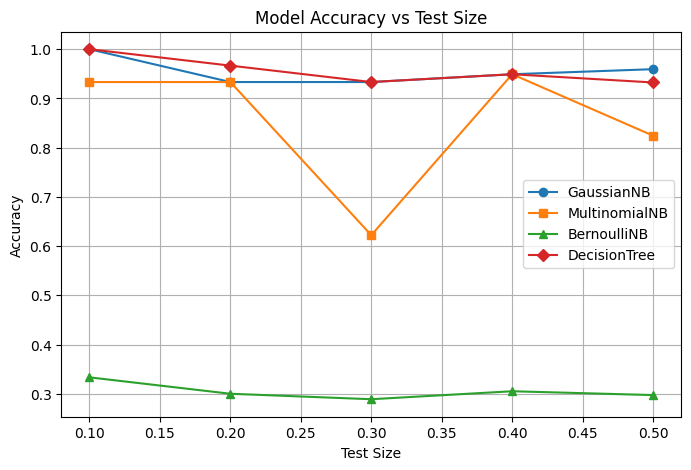

In [ ]:
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# TEsting nivebaise model accuracy at different splits
def test_nb_models_accuracy(X, y):
    test_sizes = np.linspace(0.1, 0.5, 5)
    gaussian_acc = []
    multinomial_acc = []
    bernoulli_acc = []
    decision_acc = []
    
    for t in test_sizes:
        X_train, X_test, y_train, y_test = train_test_split(
            X, y, test_size=t, shuffle=True, random_state=10
        )
        
        # Gaussian Naive Bayes
        gnb = GaussianNB()
        gnb.fit(X_train, y_train)
        y_pred_g = gnb.predict(X_test)
        gaussian_acc.append(accuracy_score(y_test, y_pred_g))
        
        # Multinomial Naive Bayes
        mnb = MultinomialNB()
        mnb.fit(X_train, y_train)
        y_pred_m = mnb.predict(X_test)
        multinomial_acc.append(accuracy_score(y_test, y_pred_m))
        
        # Bernoulli Naive Bayes
        bnb = BernoulliNB()
        bnb.fit(X_train, y_train)
        y_pred_b = bnb.predict(X_test)
        bernoulli_acc.append(accuracy_score(y_test, y_pred_b))

        # Decision Tree Regresion
        tree = DecisionTreeClassifier()
        tree.fit(X_train, y_train)
        y_pred_t = tree.predict(X_test)
        decision_acc.append(accuracy_score(y_test, y_pred_t))
    
    # Plotting
    plt.figure(figsize=(8, 5))
    plt.plot(test_sizes, gaussian_acc, marker='o', label='GaussianNB')
    plt.plot(test_sizes, multinomial_acc, marker='s', label='MultinomialNB')
    plt.plot(test_sizes, bernoulli_acc, marker='^', label='BernoulliNB')
    plt.plot(test_sizes, decision_acc, marker='D', label='DecisionTree')
    plt.xlabel('Test Size')
    plt.ylabel('Accuracy')
    plt.title('Model Accuracy vs Test Size')
    plt.legend()
    plt.grid(True)
    plt.show()

test_nb_models_accuracy(X,y)

##### From the above plot we can see that the best train test split is obtained at 90% train and 10% test

In [120]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=10,shuffle=True,test_size=0.10)

## Naive Bayes (Gaussian, Multinomial & Bernoulli) classifier

In [121]:
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

models = {
    "GaussianNB": GaussianNB(),
    "MultinomialNB": MultinomialNB(),
    "BernoulliNB": BernoulliNB()
}

for name, model in models.items():
    print("\n" + "="*120)
    print(f" MODEL: {name} ".center(120, "="))
    print("="*120)

    # Train
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    # Confusion Matrix
    print(" CONFUSION MATRIX ".center(80, "="))
    print(confusion_matrix(y_test, y_pred))
    print("=" * 80)

    # Classification Report
    print(" CLASSIFICATION REPORT ".center(80, "="))
    print(classification_report(y_test, y_pred))
    print("=" * 80)

    # Accuracy Score

    print(" ACCURACY SCORE ".center(80, "="))
    print(f"{accuracy_score(y_test, y_pred)}")
    print("=" * 80)


================================================== MODEL: GaussianNB ===================================================
=============================== CONFUSION MATRIX ===============================
[[6 0 0]
 [0 5 0]
 [0 0 4]]
============================ CLASSIFICATION REPORT =============================
              precision    recall  f1-score   support

           1       1.00      1.00      1.00         6
           2       1.00      1.00      1.00         5
           3       1.00      1.00      1.00         4

    accuracy                           1.00        15
   macro avg       1.00      1.00      1.00        15
weighted avg       1.00      1.00      1.00        15

================================ ACCURACY SCORE ================================
1.0

================================================= MODEL: MultinomialNB =================================================
=============================== CONFUSION MATRIX ===============================
[[6 0 0]
 [0 5 0]
 

/Users/satwikbiswas/Documents/Python/venv/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/satwikbiswas/Documents/Python/venv/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/satwikbiswas/Documents/Python/venv/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier

## Decision Tree classifier

In [122]:
from sklearn.tree import DecisionTreeClassifier,plot_tree
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler


### Gini Impurity

In [123]:
param_grid = {
    "tree__criterion": ["gini"],  
    "tree__splitter": ["best", "random"],                
    "tree__max_depth": [5, 10, 20, 50],            
    "tree__min_samples_split": [2, 5, 10],               
    "tree__min_samples_leaf": [1, 2, 4, 10],              
    "tree__max_features": ["sqrt", "log2"],                                   
}
pipe = Pipeline([
    ("scale",StandardScaler()),
    ("tree",DecisionTreeClassifier(random_state=13))
])

model = GridSearchCV(estimator=pipe,param_grid=param_grid,cv=5,scoring="accuracy",n_jobs=-1)
model.fit(X_train,y_train)

y_pred = model.predict(X_test)
 
### Best params and accuracy for training
print("=" * 80)
print(" BEST PARAMETERS ".center(80, "="))
print(model.best_params_)
print("=" * 80)

print(" BEST SCORE ".center(80, "="))
print(f"{model.best_score_:.4f}")
print("=" * 80)

print(" CONFUSION MATRIX ".center(80, "="))
print(confusion_matrix(y_test, y_pred))
print("=" * 80)

print(" CLASSIFICATION REPORT ".center(80, "="))
print(classification_report(y_test, y_pred))
print("=" * 80)



=============================== BEST PARAMETERS ================================
{'tree__criterion': 'gini', 'tree__max_depth': 5, 'tree__max_features': 'sqrt', 'tree__min_samples_leaf': 4, 'tree__min_samples_split': 2, 'tree__splitter': 'best'}
================================== BEST SCORE ==================================
0.9624
=============================== CONFUSION MATRIX ===============================
[[6 0 0]
 [0 5 0]
 [0 1 3]]
============================ CLASSIFICATION REPORT =============================
              precision    recall  f1-score   support

           1       1.00      1.00      1.00         6
           2       0.83      1.00      0.91         5
           3       1.00      0.75      0.86         4

    accuracy                           0.93        15
   macro avg       0.94      0.92      0.92        15
weighted avg       0.94      0.93      0.93        15



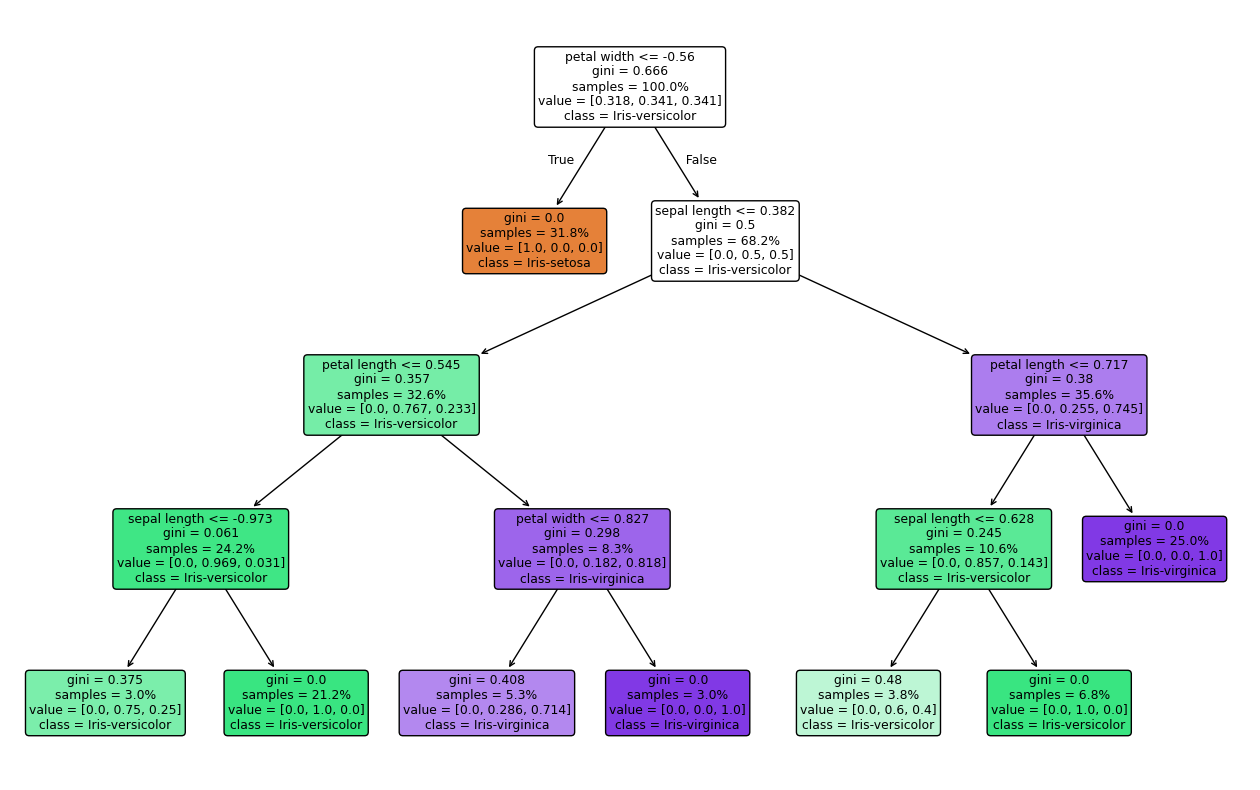

In [124]:
best_tree = model.best_estimator_.named_steps["tree"]

plt.figure(figsize=(16, 10))
plot_tree(
    best_tree,
    filled=True,               
    feature_names=['sepal length', 'sepal width', 'petal length', 'petal width'],
    class_names=['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'],
    rounded=True,
    proportion=True,           
    impurity=True               
)
plt.show()

### Entropy

In [125]:
param_grid = {
    "tree__criterion": ["entropy"],  
    "tree__splitter": ["best", "random"],                
    "tree__max_depth": [5,10,20,50,15,6,7],            
    "tree__min_samples_split": [2, 5, 10],               
    "tree__min_samples_leaf": [1, 2, 4, 10],              
    "tree__max_features": ["sqrt", "log2"],                                   
}
pipe = Pipeline([
    ("scale",StandardScaler()),
    ("tree",DecisionTreeClassifier())
])

model = GridSearchCV(estimator=pipe,param_grid=param_grid,cv=5,scoring="accuracy",n_jobs=-1)
model.fit(X_train,y_train)

y_pred = model.predict(X_test)
 
### Best params and accuracy for training
print("=" * 80)
print(" BEST PARAMETERS ".center(80, "="))
print(model.best_params_)
print("=" * 80)

print(" BEST SCORE ".center(80, "="))
print(f"{model.best_score_:.4f}")
print("=" * 80)

print(" CONFUSION MATRIX ".center(80, "="))
print(confusion_matrix(y_test, y_pred))
print("=" * 80)

print(" CLASSIFICATION REPORT ".center(80, "="))
print(classification_report(y_test, y_pred))
print("=" * 80)

=============================== BEST PARAMETERS ================================
{'tree__criterion': 'entropy', 'tree__max_depth': 10, 'tree__max_features': 'sqrt', 'tree__min_samples_leaf': 2, 'tree__min_samples_split': 5, 'tree__splitter': 'best'}
================================== BEST SCORE ==================================
0.9701
=============================== CONFUSION MATRIX ===============================
[[6 0 0]
 [0 5 0]
 [0 0 4]]
============================ CLASSIFICATION REPORT =============================
              precision    recall  f1-score   support

           1       1.00      1.00      1.00         6
           2       1.00      1.00      1.00         5
           3       1.00      1.00      1.00         4

    accuracy                           1.00        15
   macro avg       1.00      1.00      1.00        15
weighted avg       1.00      1.00      1.00        15



6


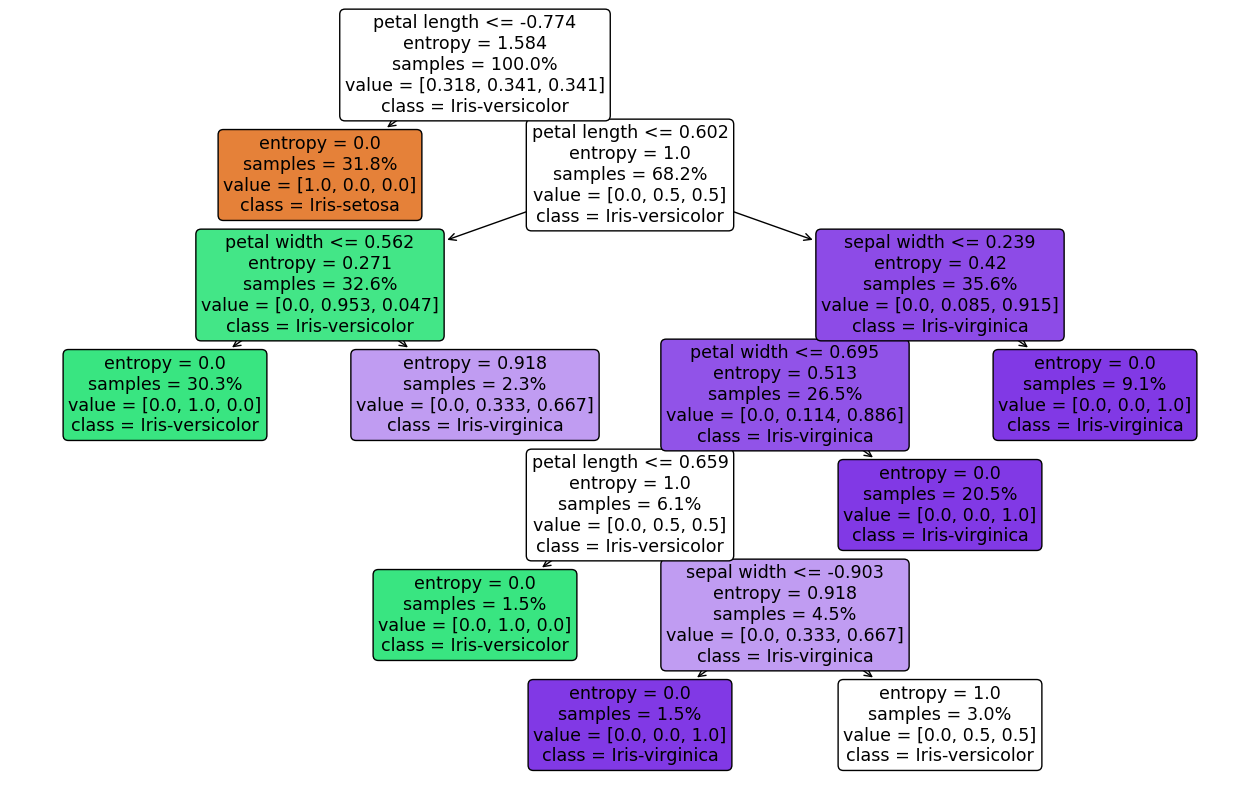

In [126]:
best_tree = model.best_estimator_.named_steps["tree"]
print(best_tree.get_depth())
plt.figure(figsize=(16, 10))
plot_tree(
    best_tree,
    filled=True,               
    feature_names=['sepal length', 'sepal width', 'petal length', 'petal width'],
    class_names=['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'],
    rounded=True,
    proportion=True,           
    impurity=True               
)
plt.show()